In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
clean_metadata_path = "Resources/clean_data.csv"


# Read the mouse data and the study results
clean_data = pd.read_csv(clean_metadata_path)
clean_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,239900,USD,239900,US,100,US,M
1,2023,SE,FT,Data Scientist,159900,USD,159900,US,100,US,M
2,2023,EN,FT,Data Analyst,162240,USD,162240,US,0,US,M
3,2023,EN,FT,Data Analyst,47840,USD,47840,US,0,US,M
4,2023,SE,FT,Data Engineer,130410,USD,130410,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7356,2023,SE,FT,Machine Learning Engineer,134500,USD,134500,US,0,US,L
7357,2023,MI,FT,Data Scientist,130000,USD,130000,US,0,US,M
7358,2023,MI,FT,Data Scientist,90000,USD,90000,US,0,US,M
7359,2023,EN,FT,Data Engineer,160000,USD,160000,US,0,US,M


In [3]:
clean_data_salary_avg = clean_data.groupby(['experience_level'])['salary'].mean()
clean_data_salary_avg

experience_level
EN    104214.773414
EX    195334.814815
MI    133462.707562
SE    168708.433672
Name: salary, dtype: float64

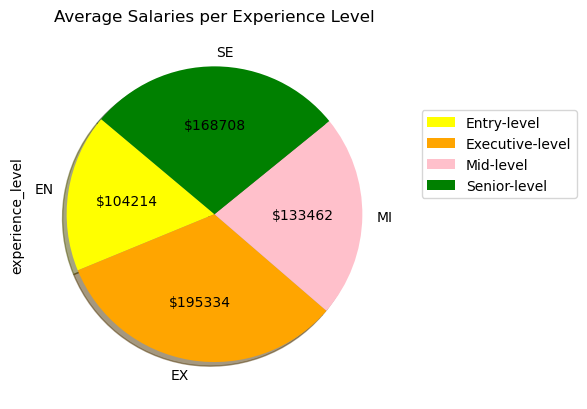

In [24]:
plt.pie(clean_data_salary_avg, labels=clean_data_salary_avg.index, colors=['yellow','orange','pink','green'],
         shadow=True, startangle=140,autopct=lambda p:f'${int(p*sum(clean_data_salary_avg)/100)}')
plt.ylabel('experience_level')
plt.title('Average Salaries per Experience Level')
plt.legend(['Entry-level','Executive-level','Mid-level', 'Senior-level'],loc='upper right',bbox_to_anchor=(1.5, 0.8))
plt.show()


In [142]:
aggregate_data = clean_data.groupby('experience_level')['salary'].agg(['mean','median']).reset_index()
aggregate_data

,experience_level,mean,median
0,EN,104214.773414,90000.0
1,EX,195334.814815,191000.0
2,MI,133462.707562,125000.0
3,SE,168708.433672,160000.0


Text(0.5, 1.0, 'Mean and Median Salary per Experience Level')

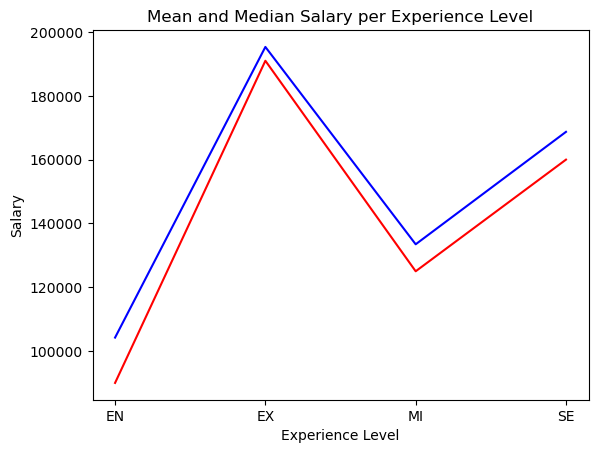

In [143]:
plt.plot(aggregate_data['experience_level'],aggregate_data['mean'],color='blue', label='mean')
plt.plot(aggregate_data['experience_level'],aggregate_data['median'],color='red', label='median')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Mean and Median Salary per Experience Level')

In [144]:
clean_data_salary_jobtitle_exp_avg = clean_data.groupby(['job_title','experience_level'])['salary'].mean()
clean_data_salary_jobtitle_exp_avg

job_title               experience_level
AI Architect            SE                  253454.545455
AI Developer            EN                  130000.000000
                        MI                  170000.000000
                        SE                  201500.000000
AI Engineer             MI                  155677.777778
                                                ...      
Research Scientist      EN                  162819.130435
                        EX                  202500.000000
                        MI                  175743.571429
                        SE                  194610.138298
Software Data Engineer  SE                  210000.000000
Name: salary, Length: 167, dtype: float64

In [145]:
clean_data_salary_jobtitle_avg = clean_data.groupby(['job_title'])['salary'].mean()
clean_data_salary_jobtitle_avg
job_title_counts = clean_data['job_title'].value_counts()
job_title_counts_df=pd.DataFrame({'job_title':job_title_counts.index,'job_title_counts':job_title_counts.values})
clean_data_salary_jobtitle_avg_df = clean_data_salary_jobtitle_avg.reset_index()
result_df =pd.merge(job_title_counts_df,clean_data_salary_jobtitle_avg_df, on='job_title')
top_5_result =result_df.head(5)
top_5_result

,job_title,job_title_counts,salary
0,Data Engineer,1636,155722.742054
1,Data Scientist,1475,170313.848136
2,Data Analyst,1076,113228.368959
3,Machine Learning Engineer,853,195266.932005
4,Applied Scientist,272,191269.033088


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Data Engineer'),
  Text(1, 0, 'Data Scientist'),
  Text(2, 0, 'Data Analyst'),
  Text(3, 0, 'Machine Learning Engineer'),
  Text(4, 0, 'Applied Scientist')])

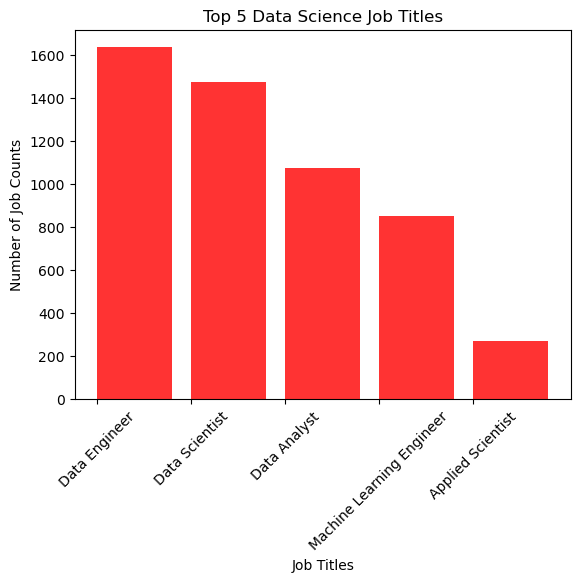

In [146]:
plt.bar(top_5_result['job_title'], top_5_result['job_title_counts'], color='r', alpha=0.8, align="edge")
plt.title('Top 5 Data Science Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Number of Job Counts')
plt.xticks(rotation=45, ha='center')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Data Engineer'),
  Text(1, 0, 'Data Scientist'),
  Text(2, 0, 'Data Analyst'),
  Text(3, 0, 'Machine Learning Engineer'),
  Text(4, 0, 'Applied Scientist')])

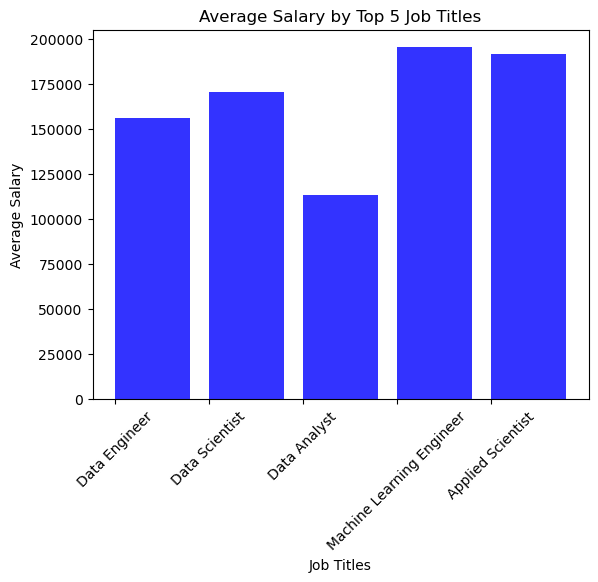

In [147]:
plt.bar(top_5_result['job_title'], top_5_result['salary'], color='b', alpha=0.8, align="edge")
plt.title('Average Salary by Top 5 Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='center')

In [148]:
clean_data_salary_mode = clean_data.mode()
clean_data_salary_mode

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Engineer,150000,USD,150000,US,0,US,M
